<h2 style="text-align:center;">Welcome to our project</h2>

# This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016.


In [1]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from sklearn import preprocessing

warnings.simplefilter(action="ignore", category=FutureWarning)

import statsmodels.api as sm
from statsmodels.formula.api import ols
import nsfg
import first
import analytic

import thinkstats2
import thinkplot

In [2]:
df = pd.read_csv("athlete_events.csv", delimiter = ',')

In [12]:
df.head(20)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


# This head is the first look of the our data


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


# General information for each column with their types and counts of non-null elements

In [6]:
df.shape


(271116, 15)

## The file athlete.csv contains 271116 rows and 15 columns.

## There are name of 15 columns:

In [7]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

Some info about columns:
1. ID - Unique number for each athlete
2. Name - Athlete's name
3. Sex - M or F
4. Age - Integer
5. Height - In centimeters
6. Weight - In kilograms
7. Team - Team name
8. NOC - National Olympic Committee 3-letter code
9. Games - Year and season
10.Year - Integer
11.Season - Summer or Winter
12.City - Host city
13.Sport - Sport
14.Event - Event
15.Medal - Gold, Silver, Bronze, or NA

<AxesSubplot:xlabel='Sex', ylabel='Frequency'>

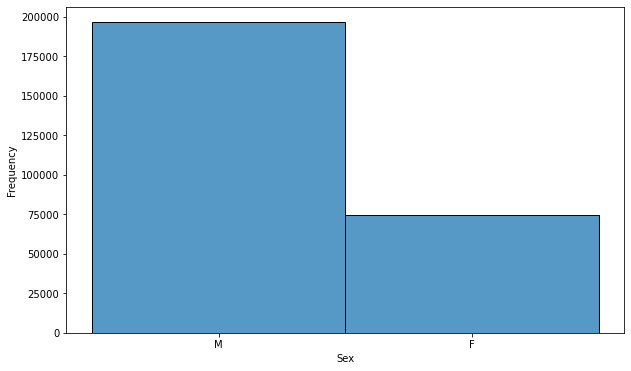

In [8]:
fig, ax=plt.subplots(figsize=(10,6))
plt.ylabel('Frequency')
sns.histplot(df.Sex)

In [9]:
print ('The exact count of Male: ', df['Sex'][df['Sex']=='M'].count())
print ('The exact count of Female: ', df['Sex'][df['Sex']=='F'].count())


The exact count of Male:  196594
The exact count of Female:  74522


## As we can see from the histogram the count of the male more than the female 

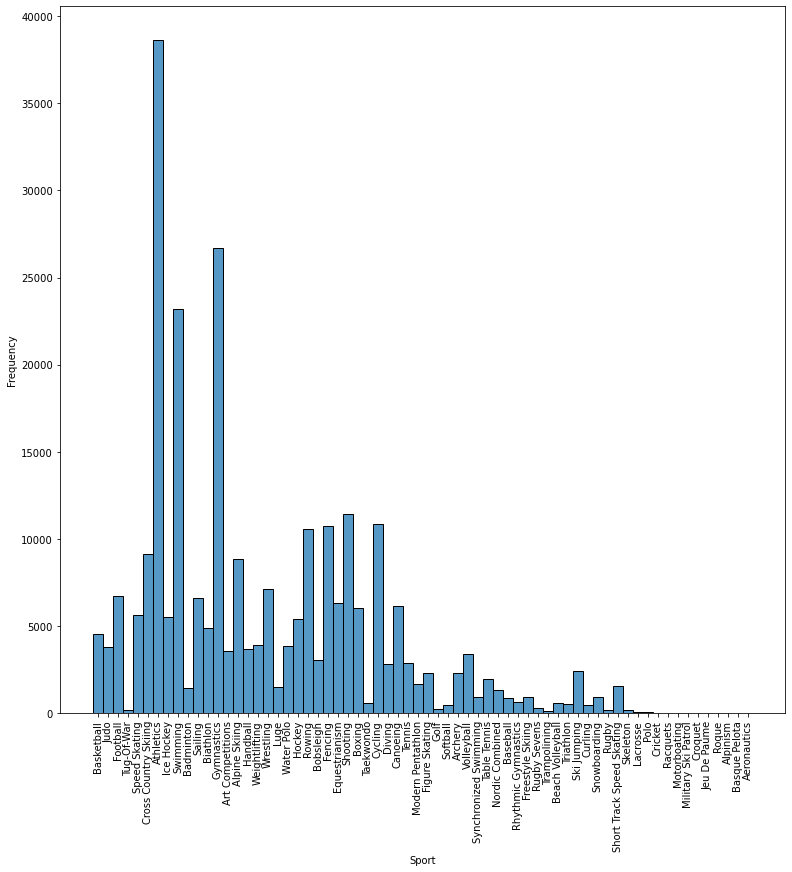

In [10]:
plt.figure(figsize=(13,13))
sns.histplot(df.Sport)
plt.ylabel('Frequency')
plt.xticks(rotation = 90)
plt.show()

### Here we can find out that there are more athletes than other types of sports.

<AxesSubplot:xlabel='Height', ylabel='Frequency'>

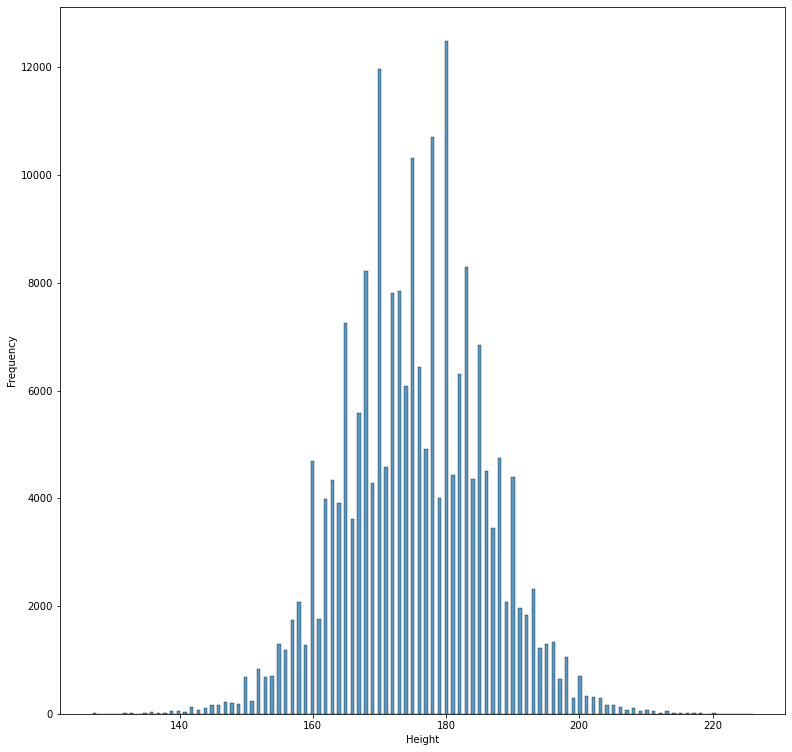

In [11]:
plt.figure(figsize=(13,13))
plt.ylabel('Frequency')
sns.histplot(df.Height)

In [12]:
df.Height.mode()

0    180.0
dtype: float64

### Among athletes, the most common height during whole Olympic Games is 180 cm
### there were deviations in the dataset in the height column which were actually real data
### for example, maximal height is 226 and minimal height is 127

<AxesSubplot:xlabel='Weight', ylabel='Frequency'>

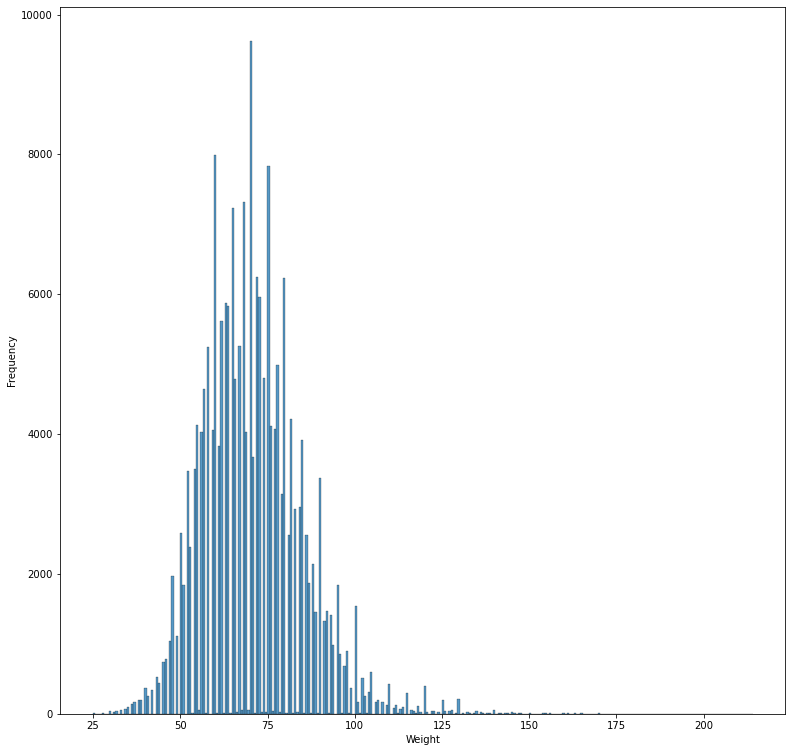

In [13]:
plt.figure(figsize=(13,13))
plt.ylabel('Frequency')
sns.histplot(df.Weight)

In [14]:
df.Weight.mode()

0    70.0
dtype: float64

### Among athletes, the most common weight during whole Olympic Games  is 70kg
### There are also weight deviations such that min kg 25 and max kg 214 kg

<AxesSubplot:xlabel='Age', ylabel='Frequency'>

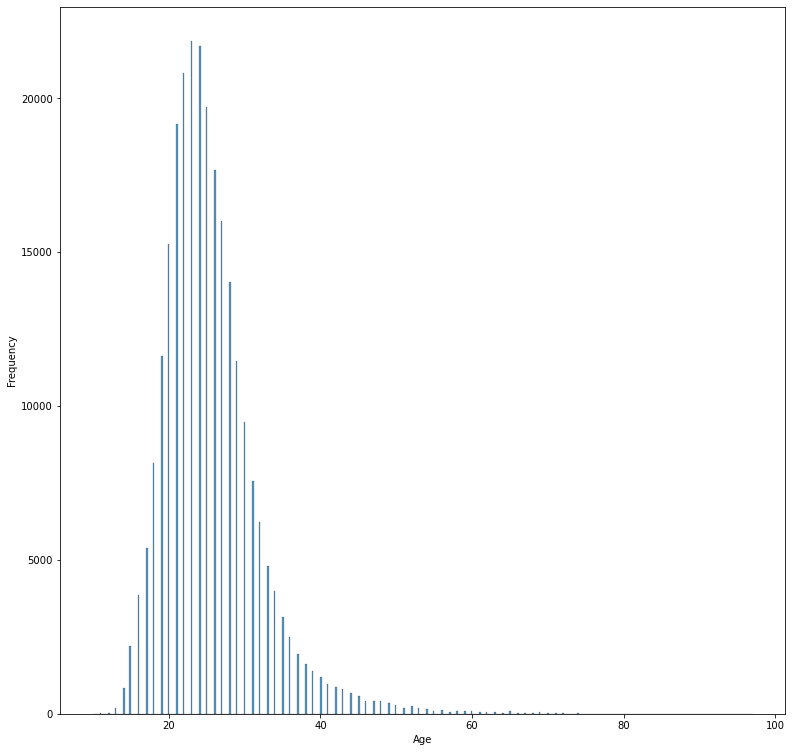

In [15]:
plt.figure(figsize=(13,13))
plt.ylabel('Frequency')
sns.histplot(df.Age)

In [16]:
df.Age.mode()

0    23.0
dtype: float64

### Olympic game athletes most often at the age of 23
### there are real deviations like youngest sportsmen is Dimitrios Loundras which 

<AxesSubplot:xlabel='Year', ylabel='Count of sportsman'>

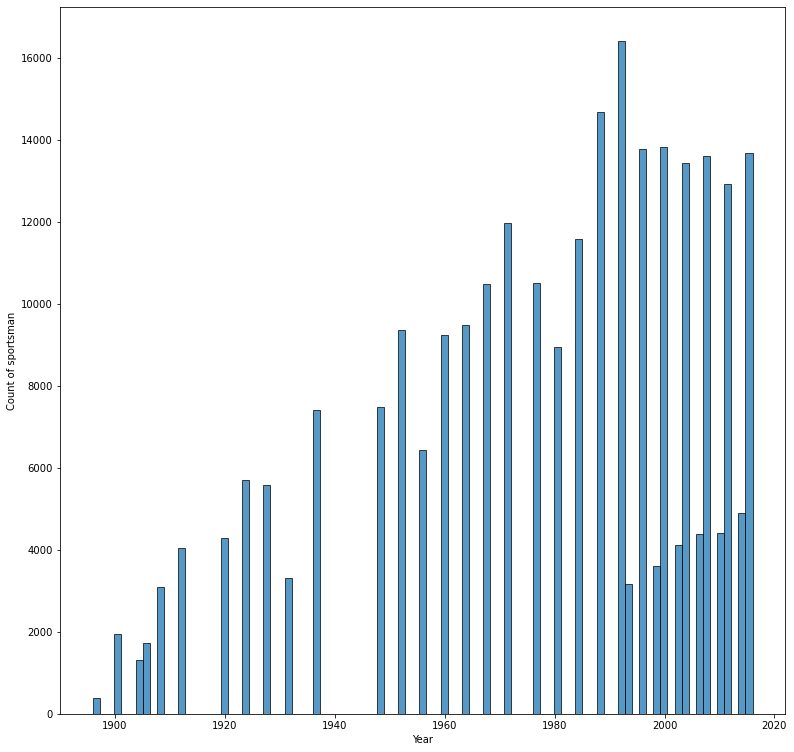

In [17]:
plt.figure(figsize=(13,13))
plt.ylabel('Count of sportsman')
sns.histplot(df.Year)

In [18]:
df.Year.mode()


0    1992
dtype: int64

In [19]:
df['Year'][df['Year']==1992].count()

16413

### the largest number of participants in the Olympiad was in 1992 and exceeded 16,000

# Task3 PMF&CDF

<AxesSubplot:xlabel='Age', ylabel='Probability'>

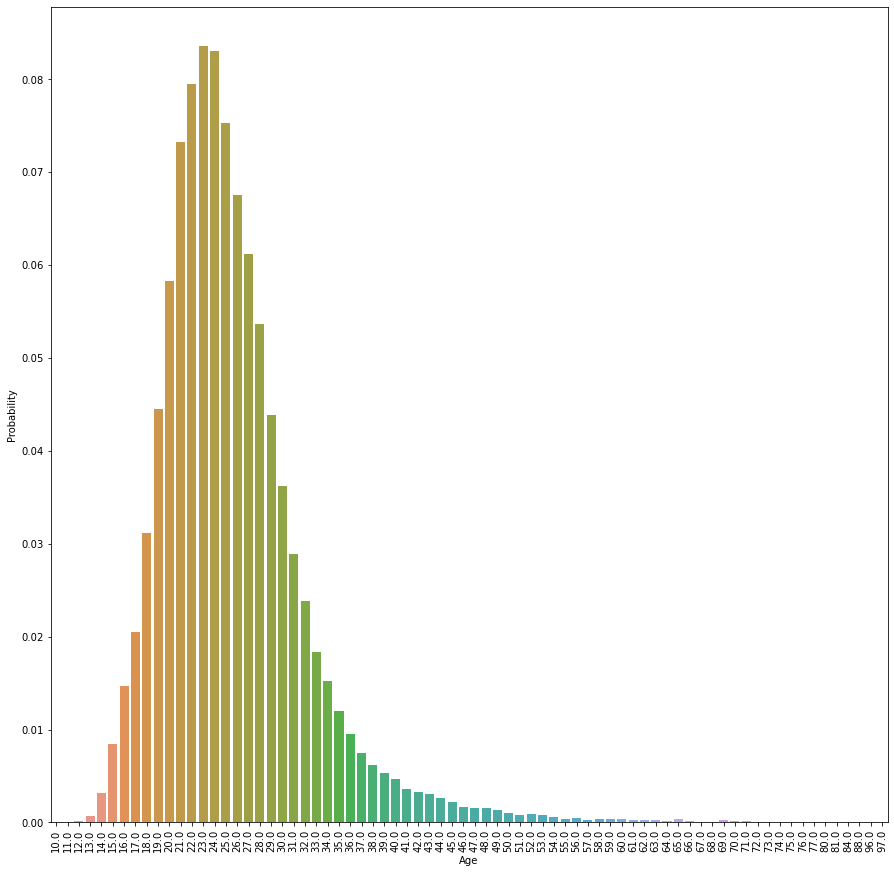

In [20]:
plt.figure(figsize=(15,15))
plt.ylabel('Probability')
plt.xlabel('Age')
plt.xticks(rotation=90)
probabilities = df['Age'].value_counts(normalize=True)    
sns.barplot(probabilities.index, probabilities.values)

### In this bar graph, shown their probability at what ages are most likely to meet. The highest probability is at the age of 23. Normal distributed

There are their probabilities:

In [21]:
df['Age'].value_counts(normalize=True)


23.0    0.083607
24.0    0.083014
22.0    0.079551
25.0    0.075320
21.0    0.073245
          ...   
77.0    0.000008
84.0    0.000004
96.0    0.000004
97.0    0.000004
10.0    0.000004
Name: Age, Length: 74, dtype: float64

<AxesSubplot:xlabel='Sex', ylabel='Probability'>

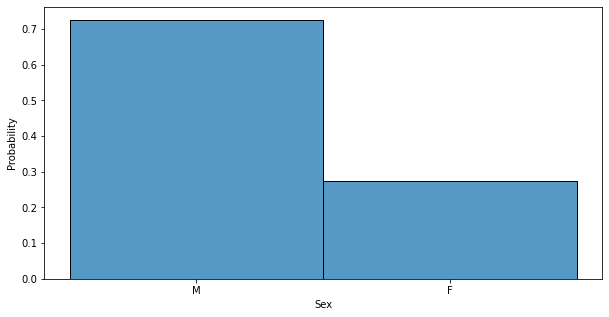

In [22]:
plt.figure(figsize=(10,5)) 
sns.histplot(df.Sex, stat='probability')

# In this histogram, we see the probability that there are twice as many men as women

Exactly their probabilities:

In [23]:
df['Sex'].value_counts(normalize=True)


M    0.725129
F    0.274871
Name: Sex, dtype: float64

<AxesSubplot:xlabel='Year', ylabel='Probability'>

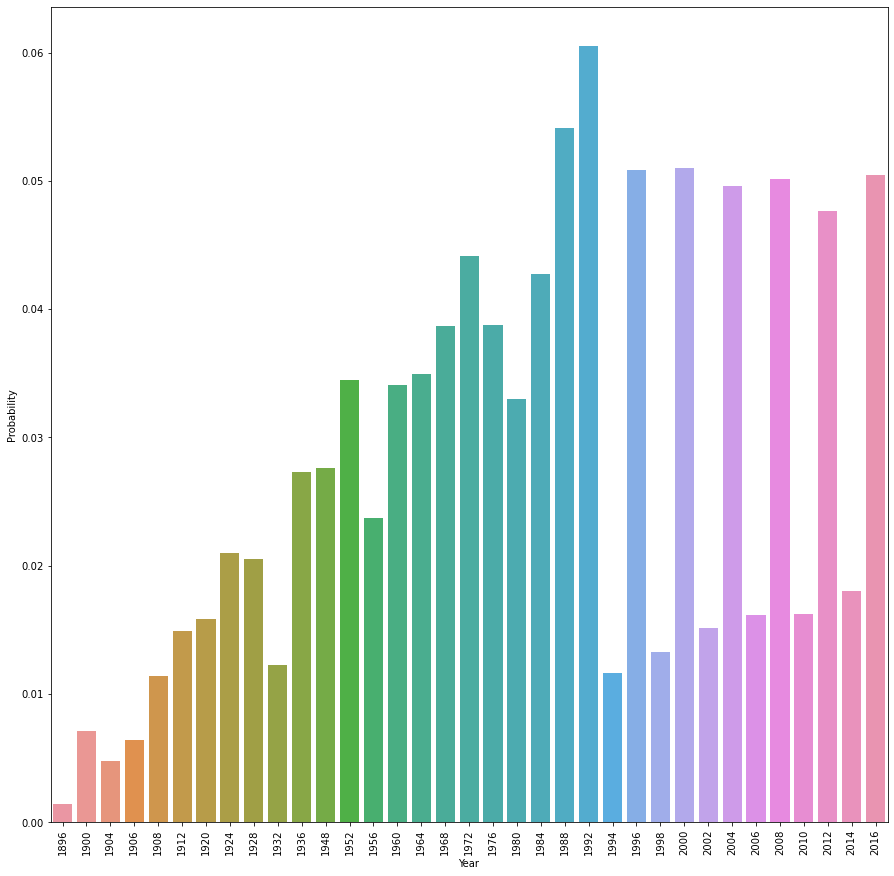

In [24]:
plt.figure(figsize=(15,15))
plt.ylabel('Probability')
plt.xlabel('Year')
plt.xticks(rotation=90)
probabilities = df['Year'].value_counts(normalize=True)    
sns.barplot(probabilities.index, probabilities.values)

# This bar graph gives us the probability of the year with the highest number of athletes. We see that most of the sportsmen in our dataset participate in Olympic Games in 1992 years

In [25]:
df['Year'].value_counts(normalize=True)

1992    0.060539
1988    0.054132
2000    0.050978
1996    0.050827
2016    0.050488
2008    0.050170
2004    0.049584
2012    0.047655
1972    0.044110
1984    0.042742
1976    0.038736
1968    0.038651
1964    0.034967
1952    0.034517
1960    0.034063
1980    0.032964
1948    0.027590
1936    0.027298
1956    0.023732
1924    0.020998
1928    0.020559
2014    0.018040
2010    0.016237
2006    0.016163
1920    0.015831
2002    0.015156
1912    0.014901
1998    0.013297
1932    0.012249
1994    0.011656
1908    0.011438
1900    0.007141
1906    0.006392
1904    0.004799
1896    0.001402
Name: Year, dtype: float64

<AxesSubplot:xlabel='Sport', ylabel='Probability'>

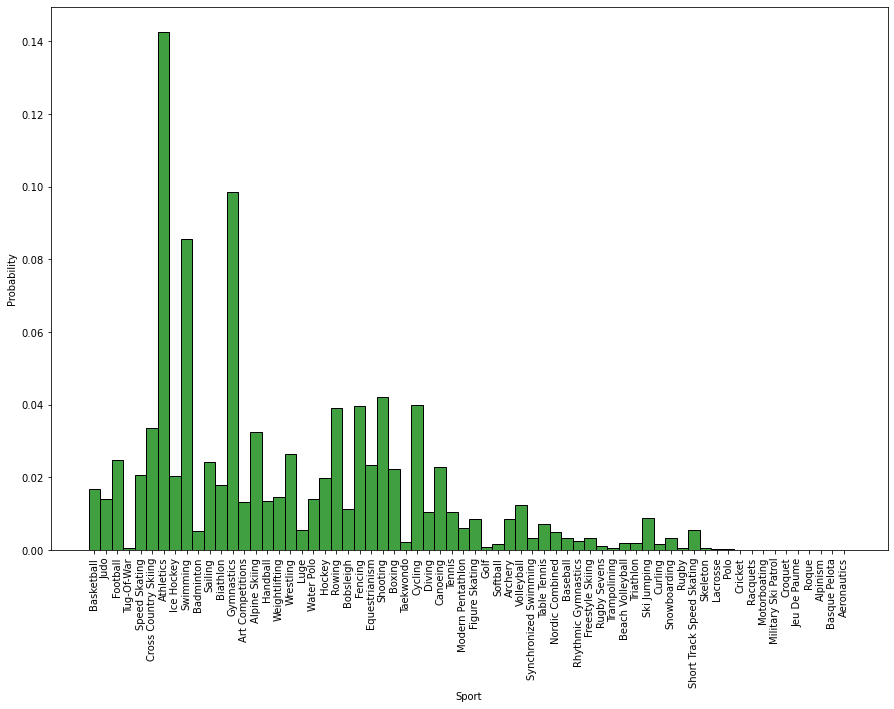

In [26]:
plt.figure(figsize=(15,10)) 
plt.xticks(rotation=90)
sns.histplot(df.Sport, stat='probability',color='green')

# This histogram gives us the probability of each sport in our dataset. We can see that the highest probability of sport belongs to athletics

In [27]:
df['Sport'].value_counts(normalize=True)

Athletics        0.142463
Gymnastics       0.098508
Swimming         0.085554
Shooting         0.042225
Cycling          0.040053
                   ...   
Racquets         0.000044
Jeu De Paume     0.000041
Roque            0.000015
Basque Pelota    0.000007
Aeronautics      0.000004
Name: Sport, Length: 66, dtype: float64

In [28]:
def ecdf(a):
    x, counts = np.unique(a, return_counts=True)
    y = np.cumsum(counts)
    x = np.insert(x, 0, x[0])
    y = np.insert(y/y[-1], 0, 0.)
    plt.plot(x, y, drawstyle='steps-post')
    plt.grid(True)
    plt.savefig('ecdf.png')

In [29]:
def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1

    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

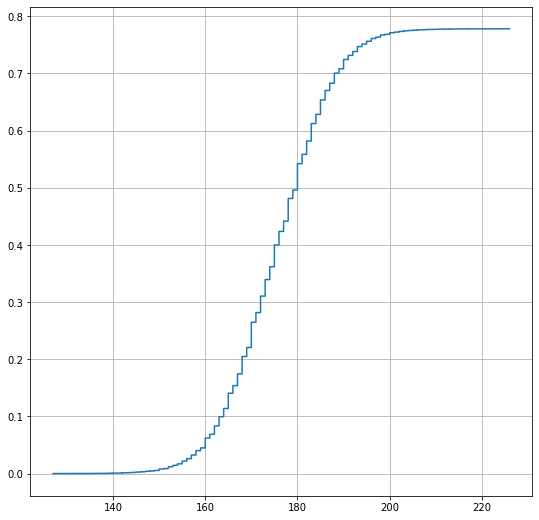

In [30]:
plt.figure(figsize=(9,9)) 
ecdf(df.Height)

In [31]:
PercentileRank(df.Height, 180)

54.20742412841736

# The percentage of athletes under 180 cm is 54%

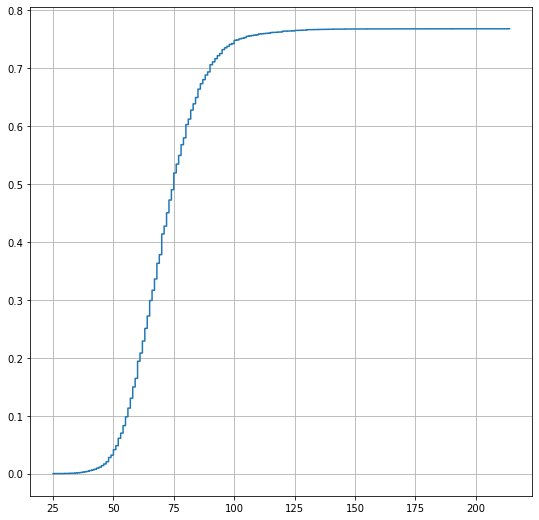

In [32]:
plt.figure(figsize=(9,9)) 
ecdf(df.Weight)

In [33]:
PercentileRank(df.Weight, 75)

51.910621283878484

# The percentage of athletes under 75 kg is 51%

# week 4

## task 1

# 1) Exponential distribution model

### in our opinion we dont have an exponential data, so we dont distribute the model

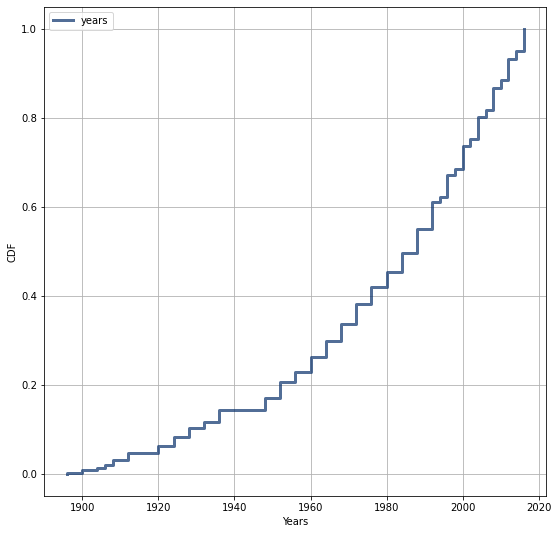

In [38]:
plt.figure(figsize=(9,9)) 
cdf = thinkstats2.Cdf(df["Year"], label='years')

thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Years', ylabel='CDF')
plt.grid(True)

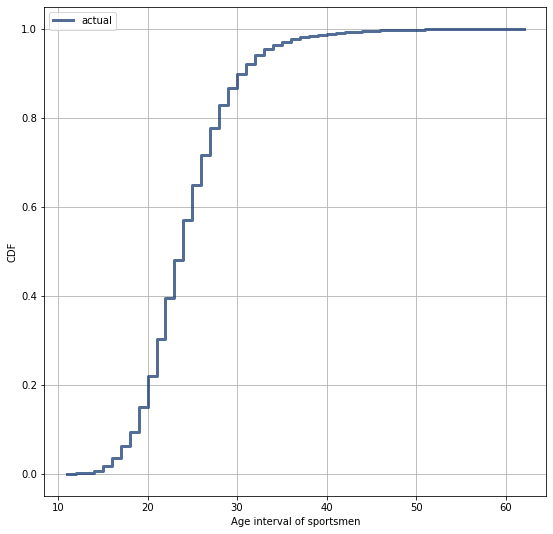

In [39]:
plt.figure(figsize=(9,9)) 
cdf = thinkstats2.Cdf(df['Age'][df['Year']==1992], label='actual')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Age interval of sportsmen', ylabel='CDF')
plt.grid(True)

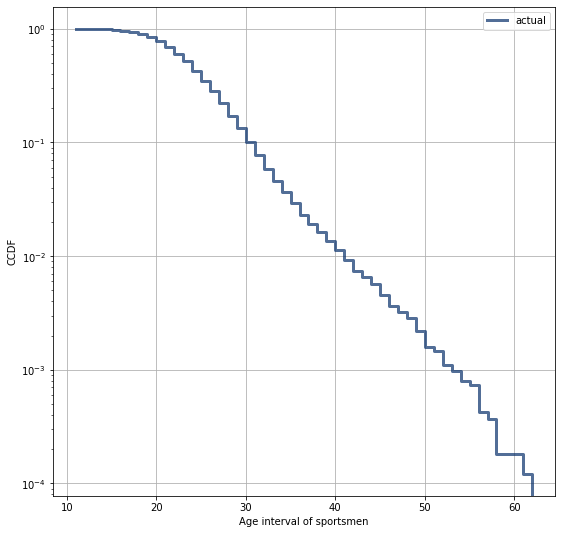

In [40]:
plt.figure(figsize=(9,9)) 
thinkplot.Cdf(cdf, complement=True)
thinkplot.Config(xlabel='Age interval of sportsmen',
                 ylabel='CCDF', yscale='log', loc='upper right')
plt.grid(True)

## Here age is a parameter of the exponentia"l CDF and CCDF

# 2) Normal probability plot

## CDF

In [14]:
weights = df.Weight.dropna()

In [43]:
def MakeNormalModel(weights):
    cdf = thinkstats2.Cdf(weights, label='weights')

    mean, var = thinkstats2.TrimmedMeanVar(weights)
    std = np.sqrt(var)
    print('n, mean, std', len(weights), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label='model', linewidth=4, color='0.8')
    thinkplot.Cdf(cdf)

n, mean, std 208241 70.4687225900028 12.929555587832578


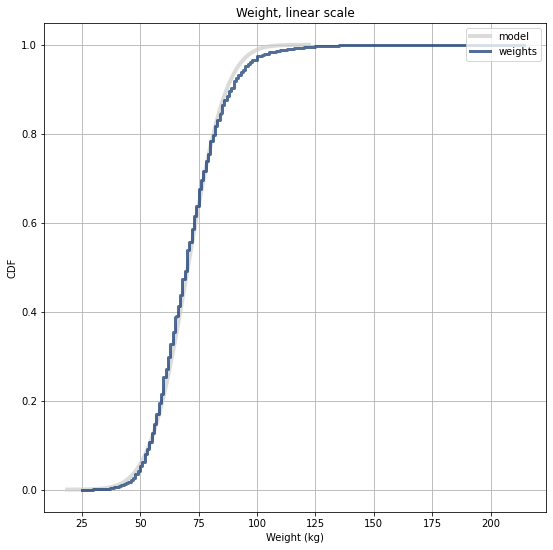

In [44]:
plt.figure(figsize=(9,9)) 
MakeNormalModel(weights)
thinkplot.Config(title='Weight, linear scale', xlabel='Weight (kg)',
                 ylabel='CDF', loc='upper right')
plt.grid(True)

## As we can see differences is small we use another way to plot normal probability. 

In [45]:
def MakeNormalPlot2(weights):
 
    mean, var = thinkstats2.TrimmedMeanVar(weights, p=0.01)
    std = np.sqrt(var)

    xs = [-5, 5]
    xs, ys = thinkstats2.FitLine(xs, mean, std)
    thinkplot.Plot(xs, ys, color='0.8', label='model')

    xs, ys = thinkstats2.NormalProbability(weights)
    thinkplot.Plot(xs, ys, label='weights')

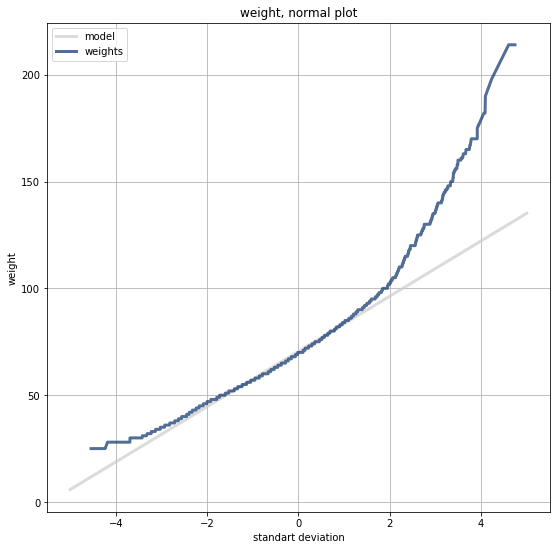

In [46]:
plt.figure(figsize=(9,9)) 
MakeNormalPlot2(weights)
thinkplot.Config(title='weight, normal plot', xlabel='standart deviation',
                 ylabel='weight', loc='upper left')
plt.grid(True)

## Here we see that intersept aproximately is 70 and slope is aproximately 20


# 3) Lognormal distribution model


n, mean, std 208241 1.8407450592798045 0.07944797960137961


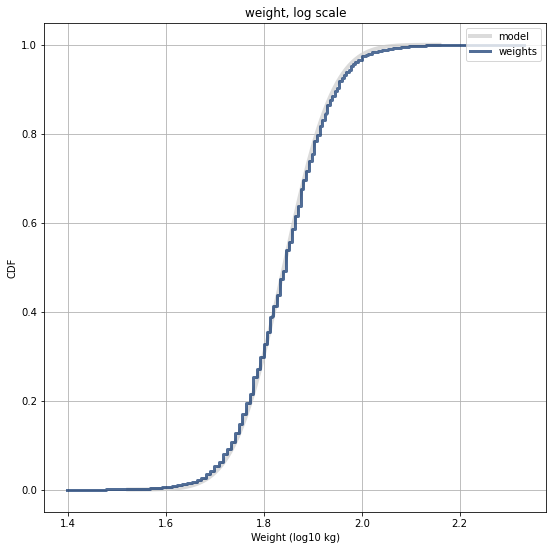

In [47]:
plt.figure(figsize=(9,9)) 
log_weights = np.log10(weights)
MakeNormalModel(log_weights)
thinkplot.Config(title='weight, log scale', xlabel='Weight (log10 kg)',
                 ylabel='CDF', loc='upper right')
plt.grid(True)

## Here also as on previous task there are small differences, so we also use another way

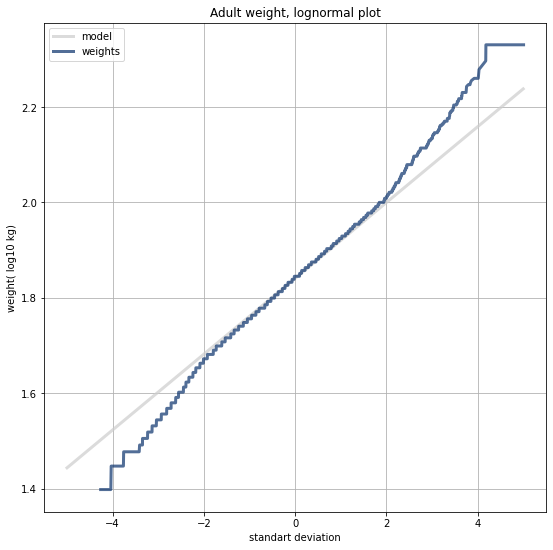

In [48]:
plt.figure(figsize=(9,9)) 
MakeNormalPlot2(log_weights)
thinkplot.Config(title='Adult weight, lognormal plot', xlabel='standart deviation',
                 ylabel='weight( log10 kg)', loc='upper left')
plt.grid(True)

## If we make a normal probability plot with log weights, the model fit the data well except in the tails, where the heaviest people exceed expectations.

# 4) Pareto distribution model

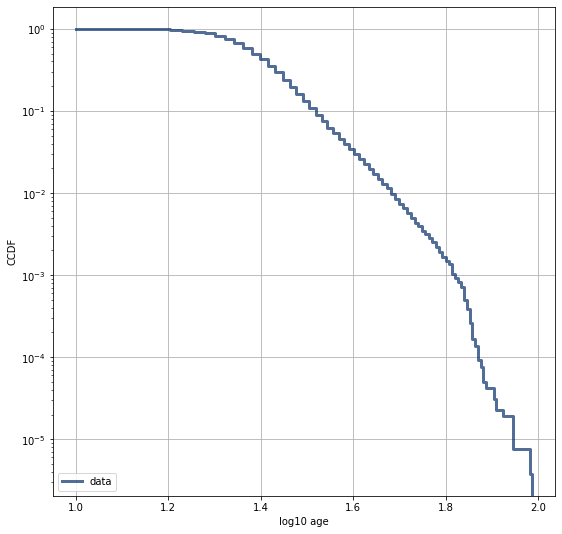

In [49]:
plt.figure(figsize=(9,9)) 
log_age = np.log10(df['Age'])
cdf = thinkstats2.Cdf(df['Age'], label='data')
cdf_log = thinkstats2.Cdf(log_age, label='data')


thinkplot.Cdf(cdf_log, complement=True) 
thinkplot.Config(xlabel='log10 age',
                 ylabel='CCDF',
                 yscale='log', loc='lower left')
plt.grid(True)

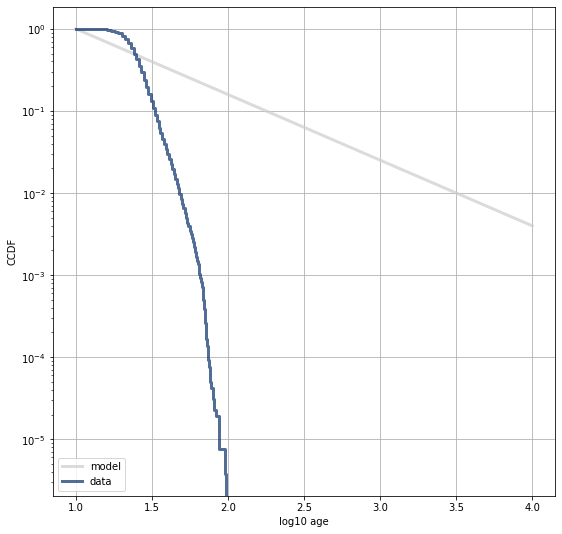

In [50]:
plt.figure(figsize=(9,9)) 
xs, ys = thinkstats2.RenderParetoCdf(xmin=10, alpha=0.8, low=0, high=1e4)
thinkplot.Plot(np.log10(xs), 1-ys, label='model', color='0.8')

thinkplot.Cdf(cdf_log, complement=True) 
thinkplot.Config(xlabel='log10 age',
                 ylabel='CCDF',
                 yscale='log', loc='lower left')
plt.grid(True)

# week 5

# 1) Scatter plots for variables

Text(0, 0.5, 'Height')

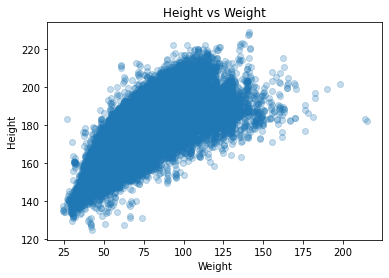

In [51]:
heights= thinkstats2.Jitter(df["Height"],2)
weights= thinkstats2.Jitter(df["Weight"],.5)
plt.scatter(weights,heights,alpha=0.25)
plt.title("Height vs Weight")
plt.xlabel("Weight")
plt.ylabel("Height")

## Here we can look that  they are located close to each other in area where height aproximately 170, and weight 80 

Text(0.5, 1.0, 'Height vs Weight')

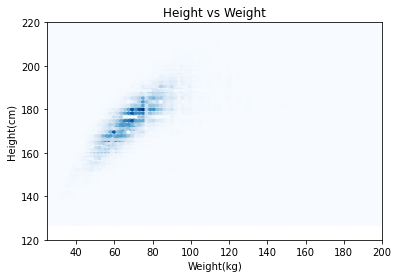

In [52]:
thinkplot.HexBin(df["Weight"],df["Height"])
thinkplot.Config(xlabel="Weight(kg)", ylabel="Height(cm)",
axis=[25,200,120,220], legend=False)
plt.title("Height vs Weight")


## This hexbin plot shows that we said to previous scatter plot, located close to each other in height 170 weight 85

# 2) Assess the relationship between variables

In [53]:
df.corr()

,ID,Age,Height,Weight,Year
ID,1.000000,-0.003631,-0.011141,-0.009176,0.011885
Age,-0.003631,1.000000,0.138246,0.212069,-0.115137
Height,-0.011141,0.138246,1.000000,0.796213,0.047578
Weight,-0.009176,0.212069,0.796213,1.000000,0.019095
Year,0.011885,-0.115137,0.047578,0.019095,1.000000


# There are we see that count of numerical variables a little, and we decided to encode a object variables 

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


### Column "Sex"

In [55]:
df.Sex.unique()

array(['M', 'F'], dtype=object)

In [15]:
LabelEncoder_ = preprocessing.LabelEncoder()

In [16]:
df.Sex = LabelEncoder_.fit_transform(df.Sex)

In [17]:
df.Sex.unique()

array([1, 0])

### Column "Sport"

In [59]:
df.Sport.unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
       'Croquet', 'Jeu De Paume', 'Roque', 'Al

In [18]:
df.Sport = LabelEncoder_.fit_transform(df.Sport)

In [61]:
df.Sport.unique()

array([ 8, 32, 24, 61, 53, 17,  5, 30, 54,  6, 46, 11, 27,  4,  1, 28, 64,
       65, 34, 63, 29, 43, 12, 22, 21, 47, 13, 57, 19, 20, 14, 58, 36, 23,
       26, 52,  3, 62, 55, 56, 38,  7, 41, 25, 45, 59, 10, 60, 50, 18, 51,
       44, 48, 49, 33, 39, 15, 40, 37, 35, 16, 31, 42,  2,  9,  0])

### Column "Medal"

In [62]:
df.Medal.unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [19]:
df.Medal = LabelEncoder_.fit_transform(df.Medal)

In [64]:
df.Medal.unique()

array([3, 1, 0, 2])

### Correlation

In [65]:
df.corr()

,ID,Sex,Age,Height,Weight,Year,Sport,Medal
ID,1.000000,-0.026945,-0.003631,-0.011141,-0.009176,0.011885,0.012919,-0.011849
Sex,-0.026945,1.000000,0.179324,0.488424,0.511433,-0.289882,-0.003331,0.006636
Age,-0.003631,0.179324,1.000000,0.138246,0.212069,-0.115137,-0.073345,-0.020924
Height,-0.011141,0.488424,0.138246,1.000000,0.796213,0.047578,0.036675,-0.079183
Weight,-0.009176,0.511433,0.212069,0.796213,1.000000,0.019095,0.085898,-0.080301
Year,0.011885,-0.289882,-0.115137,0.047578,0.019095,1.000000,0.044597,0.052794
Sport,0.012919,-0.003331,-0.073345,0.036675,0.085898,0.044597,1.000000,-0.057715
Medal,-0.011849,0.006636,-0.020924,-0.079183,-0.080301,0.052794,-0.057715,1.000000


### According to this data, we can conclude that corr exist between Height&Weight, corr can be between Sex&Height,Sex&Weight

In [66]:
df.cov()

,ID,Sex,Age,Height,Weight,Year,Sport,Medal
ID,1.522739e+09,-469.418230,-905.379998,-4569.988638,-5135.523131,13856.509870,9782.713394,-358.305253
Sex,-4.694182e+02,0.199318,0.516571,2.395342,3.424849,-3.866702,-0.028861,0.002296
Age,-9.053800e+02,0.516571,40.877620,8.049101,16.716392,-21.074820,-9.101291,-0.104403
Height,-4.569989e+03,2.395342,8.049101,110.638048,120.284795,10.658135,7.548048,-0.646743
Weight,-5.135523e+03,3.424849,16.716392,120.284795,205.865678,5.603904,24.257427,-0.892911
Year,1.385651e+04,-3.866702,-21.074820,10.658135,5.603904,892.672893,25.855314,1.222315
Sport,9.782713e+03,-0.028861,-9.101291,7.548048,24.257427,25.855314,376.535077,-0.867846
Medal,-3.583053e+02,0.002296,-0.104403,-0.646743,-0.892911,1.222315,-0.867846,0.600495


## In this case we see how much height and weight are linearly related to each other.

In [67]:
df.corr(method='pearson')

,ID,Sex,Age,Height,Weight,Year,Sport,Medal
ID,1.000000,-0.026945,-0.003631,-0.011141,-0.009176,0.011885,0.012919,-0.011849
Sex,-0.026945,1.000000,0.179324,0.488424,0.511433,-0.289882,-0.003331,0.006636
Age,-0.003631,0.179324,1.000000,0.138246,0.212069,-0.115137,-0.073345,-0.020924
Height,-0.011141,0.488424,0.138246,1.000000,0.796213,0.047578,0.036675,-0.079183
Weight,-0.009176,0.511433,0.212069,0.796213,1.000000,0.019095,0.085898,-0.080301
Year,0.011885,-0.289882,-0.115137,0.047578,0.019095,1.000000,0.044597,0.052794
Sport,0.012919,-0.003331,-0.073345,0.036675,0.085898,0.044597,1.000000,-0.057715
Medal,-0.011849,0.006636,-0.020924,-0.079183,-0.080301,0.052794,-0.057715,1.000000


In [68]:
df.corr(method='spearman')

,ID,Sex,Age,Height,Weight,Year,Sport,Medal
ID,1.000000,-0.026931,-0.002076,-0.010786,-0.012093,0.013191,0.014210,-0.012357
Sex,-0.026931,1.000000,0.185937,0.497472,0.558823,-0.290901,-0.004382,0.007359
Age,-0.002076,0.185937,1.000000,0.145411,0.216990,0.000777,-0.083018,-0.039984
Height,-0.010786,0.497472,0.145411,1.000000,0.827131,0.050298,0.020105,-0.082704
Weight,-0.012093,0.558823,0.216990,0.827131,1.000000,0.009067,0.078142,-0.087860
Year,0.013191,-0.290901,0.000777,0.050298,0.009067,1.000000,0.050641,0.039780
Sport,0.014210,-0.004382,-0.083018,0.020105,0.078142,0.050641,1.000000,-0.070008
Medal,-0.012357,0.007359,-0.039984,-0.082704,-0.087860,0.039780,-0.070008,1.000000


## In the table we see that there is a correlation between height and weight, as well as sex and weight. That is, if the coefficient is greater than 0.5, this means that there is a correlation between them.

# week 7

# 1) sampling distribution

In [44]:
import math
import statistics as statistics
import scipy.stats as stats

In [70]:
df.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,1,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,8,Basketball Men's Basketball,3
1,2,A Lamusi,1,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,32,Judo Men's Extra-Lightweight,3
2,3,Gunnar Nielsen Aaby,1,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,24,Football Men's Football,3
3,4,Edgar Lindenau Aabye,1,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,61,Tug-Of-War Men's Tug-Of-War,1
4,5,Christine Jacoba Aaftink,0,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,53,Speed Skating Women's 500 metres,3
5,5,Christine Jacoba Aaftink,0,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,53,"Speed Skating Women's 1,000 metres",3
6,5,Christine Jacoba Aaftink,0,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,53,Speed Skating Women's 500 metres,3
7,5,Christine Jacoba Aaftink,0,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,53,"Speed Skating Women's 1,000 metres",3
8,5,Christine Jacoba Aaftink,0,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,53,Speed Skating Women's 500 metres,3
9,5,Christine Jacoba Aaftink,0,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,53,"Speed Skating Women's 1,000 metres",3


In [71]:
y=df['Age']
std=y.std()
means=y.mean()

## in this lab we will work with column AGE, so we copy it to new variable, then find standard deviation and mean

In [72]:
n=len(y)
def z_score():
    numOfTails= 2
    alpha = (1 - 0.95)/numOfTails
 
    z_score= stats.norm.ppf(1 - alpha)
    return z_score
print(z_score())

1.959963984540054


In [73]:
# Your code goes here
z_scores = z_score()
me = z_scores*(std/math.sqrt(n))
low = means-me
High =means+me
print(low,' - ', High)

25.532831836003766  -  25.580964878590983


## here we find confidence interval using z-score

In [74]:
def RMSE(estimates, actual):
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return math.sqrt(mse)

In [91]:
def SimulateSample(mu, sigma, n, m):
    means = []
    for j in range(m):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        means.append(xbar)

    cdf = thinkstats2.Cdf(means)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    stderr = RMSE(means, mu)
    return means

In [89]:
RMSE =SimulateSample(means,std, n, 100)
RMSE

0.012985904651891308


## here RMSE shows us root mean square error, in our case its aproximately equal to 0.012985

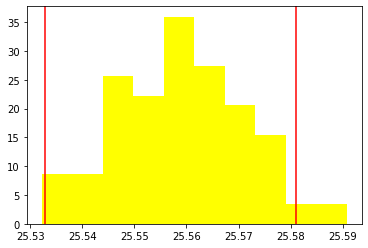

In [92]:
# Your code goes here
plt.axvline(low, color='r')
plt.axvline(High, color='r')
simulate =SimulateSample(means,std, n, 100)
plt.hist(simulate, density=True, color='yellow')
plt.show()

## then we make sample distribution for column AGE with error line 

# Hypothesis Testing with Z-test(T-test)

In [49]:
dh = df['Height']
dh

0         180.0
1         170.0
2           NaN
3           NaN
4         185.0
          ...  
271111    179.0
271112    176.0
271113    176.0
271114    185.0
271115    185.0
Name: Height, Length: 271116, dtype: float64

In [50]:
dh=dh.dropna()

In [51]:
def SimpleRandomSampling2(n):
    return dh.iloc[np.random.randint(0, len(dh), n)]

In [52]:
d_mean = dh.mean()
d_std =dh.std()
print(d_mean, d_std)

175.33896987366376 10.518462222678274


In [53]:
d_100= SimpleRandomSampling2(100)
m_100 = d_100.mean()
print(m_100)

175.51


## so in this case our null hypothesis is 173.4, while alternative hypothesis is all cases where hypothesis not equal to 173.4
# H0 mu=175.33
# H1 mu!=175.33

In [54]:
nu=175.3

In [55]:
z= (d_mean-nu)/(d_std/np.sqrt(100))
print(z)

0.03704902184249407


## Because of our hypothesis two sided i will use widely used level of significance(2.5%). p value for our z is equal 0.9671

## so because of our p value is greater than our alfa(level of significance) we cant reject our hull hypothesis. 

# week8

## 1. linear least squares

In [3]:
cleaned = df.dropna(subset=['Age', 'Weight'])

In [4]:
age,weight=cleaned.Age, cleaned.Weight

In [5]:
def LeastSquares(xs, ys):
    meanx, varx = np.mean(xs), np.var(xs)
    meany = np.mean(ys)

    slope = thinkstats2.Cov(xs, ys, meanx, meany) / varx
    inter = meany - slope * meanx

    return inter, slope

## The following function computes the intercept and slope of the least squares fit.

In [6]:
inter, slope = LeastSquares(age, weight)
inter, slope

(56.81073595676404, 0.5546711397662509)

In [121]:
def FitLine(xs, inter, slope):
    fit_xs = np.sort(xs)
    fit_ys = inter + slope * fit_xs
    return fit_xs, fit_ys

In [122]:
fit_xs, fit_ys = FitLine(age, inter, slope)

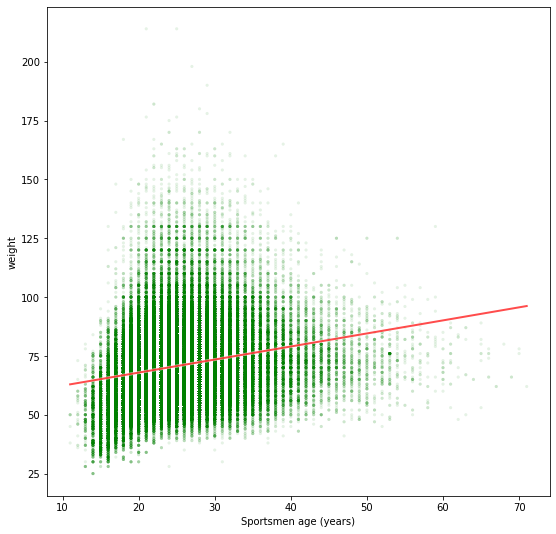

In [123]:
plt.figure(figsize=(9,9)) 
thinkplot.Scatter(age, weight, color='green', alpha=0.1, s=10)
thinkplot.Plot(fit_xs, fit_ys, color='white', linewidth=3)
thinkplot.Plot(fit_xs, fit_ys, color='red', linewidth=2)
thinkplot.Config(xlabel="Sportsmen age (years)",
                 ylabel='weight',
                 legend=False)

## Here's a scatterplot of the data with the fitted line. You can see that with increasing age, its weight increases accordingly. You can see that weight depends on age.

# 2. Find residuals of the linear fit

In [99]:
def Residuals(xs, ys, inter, slope):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    res = ys - (inter + slope * xs)
    return res

In [100]:
df['residual'] = Residuals(df.Age, df.Weight, inter, slope)

## To visualize the residuals, I'll split the respondents into groups by age, then plot the percentiles of the residuals versus the average age in each group. First I'll make the groups and compute the average age in each group.

In [101]:
bins = np.arange(11, 71, 3)
indices = np.digitize(df.Age, bins)
groups = df.groupby(indices)

age_means = [group.Age.mean() for _, group in groups][1:-1]
age_means

[12.728033472803347,
 15.4374637260592,
 18.248976997338207,
 21.100586573973494,
 23.96575147704654,
 26.92392602056846,
 29.863065591020696,
 32.84957753975118,
 35.844511793385166,
 38.904897090134845,
 41.93874425727412,
 44.8502358490566,
 47.96091758708581,
 50.95284327323162,
 53.79399141630901,
 56.83450704225352,
 59.92181069958848,
 62.78378378378378,
 65.57857142857142]

In [102]:
cdfs = [thinkstats2.Cdf(group.residual) for _, group in groups][1:-1]

In [103]:
def PlotPercentiles(age_means, cdfs):
    thinkplot.PrePlot(3)
    for percent in [75, 50, 25]:
        weight_percentiles = [cdf.Percentile(percent) for cdf in cdfs]
        label = '%dth' % percent
        thinkplot.Plot(age_means, weight_percentiles, label=label)

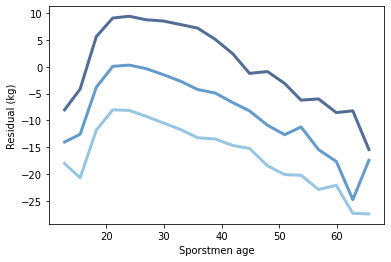

In [104]:
PlotPercentiles(age_means, cdfs)

thinkplot.Config(xlabel="Sporstmen age",
                 ylabel='Residual (kg)')

## The following figure shows the 25th, 50th, and 75th percentiles. Curvature in the residuals suggests a non-linear relationship.

# 3. Test your linear model

In [5]:
class SlopeTest(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        ages, weights = data
        _, slope = thinkstats2.LeastSquares(ages, weights)
        return slope

    def MakeModel(self):
        _, weights = self.data
        self.ybar = weights.mean()
        self.res = weights - self.ybar

    def RunModel(self):
        ages, _ = self.data
        weights = self.ybar + np.random.permutation(self.res)
        return ages, weights

In [98]:
new=df.copy()
new['Age'].isnull().sum()

9474

In [110]:
new['Weight'].mode()

0    70.0
dtype: float64

In [107]:
new['Age'].mode()

0    70.0
dtype: float64

In [108]:
new['Age'].fillna(value=23,inplace=True)
new['Weight'].fillna(value=70,inplace=True)


In [109]:
new['Age'].isnull().sum()

0

## we fill nans with mode value, and find whether the observed slope is statistically significant 

In [112]:
ht = SlopeTest((new['Age'],new['Weight']))
pvalue = ht.PValue()
pvalue

0.0

In [113]:
ht.actual, ht.MaxTestStat()

(0.31711635785794123, 0.010837622840614652)

## We can see that after 1000 attempts, it is significantly less than the observed value. 

In [135]:
def SampleRows(df, nrows, replace=False):
    """Choose a sample of rows from a DataFrame.

    df: DataFrame
    nrows: number of rows
    replace: whether to sample with replacement

    returns: DataDf
    """
    indices = np.random.choice(df.index, nrows, replace=replace)
    sample = df.loc[indices]
    return sample

def ResampleRows(df):
    """Resamples rows from a DataFrame.

    df: DataFrame

    returns: DataFrame
    """
    return SampleRows(df, len(df), replace=True)

In [136]:
def SamplingDistributions(live, iters=101):
    t = []
    for _ in range(iters):
        sample = ResampleRows(live)
        ages = sample.Age
        weights = sample.Weight
        estimates = LeastSquares(ages, weights)
        t.append(estimates)

    inters, slopes = zip(*t)
    return inters, slopes

In [137]:
inters, slopes = SamplingDistributions(new, iters=1001)

In [138]:
inters,slopes

((62.484599909104986,
  62.56730905477965,
  62.35242232699988,
  62.53380031004455,
  62.43115452679112,
  62.50511820734668,
  62.56263505223262,
  62.4120605983392,
  62.39435455112134,
  62.4427595131423,
  62.47625923112938,
  62.52594866773249,
  62.406984145499344,
  62.41626626231141,
  62.5192989992204,
  62.483848984197834,
  62.50246224507583,
  62.49147693656945,
  62.45481425345933,
  62.466053199451395,
  62.42366125986157,
  62.39746800534347,
  62.42841114877479,
  62.41948729777813,
  62.42991456202027,
  62.415418836166545,
  62.47231760448578,
  62.38440162794963,
  62.58595544658421,
  62.41920010800777,
  62.29038846288098,
  62.53008515754945,
  62.29735086032953,
  62.52675544991454,
  62.562644499353446,
  62.525758612173384,
  62.50999760750386,
  62.50430021689655,
  62.58718114366293,
  62.480146071691,
  62.296633242759185,
  62.52888621955382,
  62.461967944377676,
  62.334571279858594,
  62.566592496201,
  62.37844023213081,
  62.38603362258709,
  62.46887

In [145]:
sampling_cdf = thinkstats2.Cdf(slopes)

In [147]:
sampling_cdf

Cdf([0.30301514 0.30390334 0.30620765 ... 0.32806821 0.32822638 0.32828535], [9.99000999e-04 1.99800200e-03 2.99700300e-03 ... 9.98001998e-01
 9.99000999e-01 1.00000000e+00])

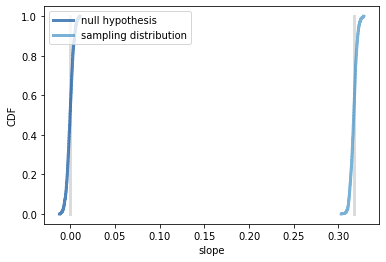

In [174]:
thinkplot.PrePlot(2)
thinkplot.Plot([0, 0], [0, 1], color='0.8')
ht.PlotCdf(label='null hypothesis')
thinkplot.Cdf(sampling_cdf, label='sampling distribution')
thinkplot.Config(xlabel='slope',
                   ylabel='CDF',
                   legend=True, loc='upper left')

## The distribution of slopes under the null hypothesis, and the sampling distribution of the slope under resampling, have the same shape, but one has mean at 0 and the other has mean at the observed slope.


In [141]:
pvalue = sampling_cdf[0]
pvalue

0

# week 9

In [79]:
import statsmodels.formula.api as smf

In [4]:
LabelEncoder_ = preprocessing.LabelEncoder()

In [5]:
df.Medal = LabelEncoder_.fit_transform(df.Medal)

In [6]:
df.Medal.unique()

array([3, 1, 0, 2])

# First step make model with one dependent and one explonatory variables

# In our laboratory work we used independent variables as weight, age, height, team, while the dependent variable we have a medal.

# Medal&Age

In [7]:
formula = 'Medal ~ Age'
model = smf.ols(formula, data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Medal   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     114.6
Date:                Fri, 12 Nov 2021   Prob (F-statistic):           9.74e-27
Time:                        11:26:28   Log-Likelihood:            -3.0632e+05
No. Observations:              261642   AIC:                         6.126e+05
Df Residuals:                  261640   BIC:                         6.127e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7661      0.006    440.092      0.000       2.754       2.778
Age           -0.0026      0.000    -10.705      0.000      -0.003      -0.002
==============================================================================
Omnibus:                   131046.606   Durbin-Watson:                   1.712
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           596474.991
Skew:                          -2.570   Prob(JB):                         0.00
Kurtosis:                       8.319   Cond. No.                         109.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
results.rsquared

0.0004378280901845555

# Medal&Height

In [9]:
formula = 'Medal ~ Height'
model = smf.ols(formula, data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Medal   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1331.
Date:                Fri, 12 Nov 2021   Prob (F-statistic):          1.72e-290
Time:                        11:26:29   Log-Likelihood:            -2.4530e+05
No. Observations:              210945   AIC:                         4.906e+05
Df Residuals:                  210943   BIC:                         4.906e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7294      0.028    132.506      0.000       3.674       3.785
Height        -0.0058      0.000    -36.482      0.000      -0.006      -0.006
==============================================================================
Omnibus:                   106243.807   Durbin-Watson:                   1.699
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           491839.489
Skew:                          -2.577   Prob(JB):                         0.00
Kurtosis:                       8.421   Cond. No.                     2.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
results.rsquared

0.006269984235997672

# Medal&Weight

In [11]:
formula = 'Medal ~ Weight'
model = smf.ols(formula, data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Medal   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1352.
Date:                Fri, 12 Nov 2021   Prob (F-statistic):          6.45e-295
Time:                        11:26:31   Log-Likelihood:            -2.4172e+05
No. Observations:              208241   AIC:                         4.835e+05
Df Residuals:                  208239   BIC:                         4.835e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0129      0.009    353.980      0.000       2.996       3.030
Weight        -0.0043      0.000    -36.763      0.000      -0.005      -0.004
==============================================================================
Omnibus:                   105498.573   Durbin-Watson:                   1.699
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           494180.324
Skew:                          -2.590   Prob(JB):                         0.00
Kurtosis:                       8.489   Cond. No.                         363.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
results.rsquared

0.006448324508234071

In [13]:
df.Team = LabelEncoder_.fit_transform(df.Team)

In [14]:
df.Team.unique()

array([198, 273, 278, ..., 959, 294, 284])

# Medal&Team

In [15]:
formula = 'Medal ~ Team'
model = smf.ols(formula, data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Medal   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     877.0
Date:                Fri, 12 Nov 2021   Prob (F-statistic):          2.04e-192
Time:                        11:26:33   Log-Likelihood:            -3.1512e+05
No. Observations:              271116   AIC:                         6.303e+05
Df Residuals:                  271114   BIC:                         6.303e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7798      0.003    956.705      0.000       2.774       2.786
Team          -0.0001    4.3e-06    -29.613      0.000      -0.000      -0.000
==============================================================================
Omnibus:                   137726.967   Durbin-Watson:                   1.716
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           646917.388
Skew:                          -2.597   Prob(JB):                         0.00
Kurtosis:                       8.503   Cond. No.                     1.32e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
results.rsquared

0.003224205624862031

# Medal&Age+Height+Weight+Team

In [17]:
formula = 'Medal ~ Age+Height+Weight+Team'
model = smf.ols(formula, data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Medal   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     533.1
Date:                Fri, 12 Nov 2021   Prob (F-statistic):               0.00
Time:                        11:26:34   Log-Likelihood:            -2.3909e+05
No. Observations:              206165   AIC:                         4.782e+05
Df Residuals:                  206160   BIC:                         4.782e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5479      0.038     94.334      0.000       3.474       3.622
Age           -0.0016      0.000     -4.964      0.000      -0.002      -0.001
Height        -0.0033      0.000    -12.195      0.000      -0.004      -0.003
Weight        -0.0023      0.000    -11.463      0.000      -0.003      -0.002
Team          -0.0001   4.89e-06    -24.723      0.000      -0.000      -0.000
==============================================================================
Omnibus:                   104131.583   Durbin-Watson:                   1.702
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           486879.823
Skew:                          -2.580   Prob(JB):                         0.00
Kurtosis:                       8.481   Cond. No.                     1.55e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
results.rsquared

0.010238143775669117

#  At every step we see r -squared growing significantly in favor of the model. As a result, when we added all the independent variables, we got a relatively good r -squared

# Finding appropriate residual to show final OLS

# Medal&Age+Height+Weight+Team + age2

In [50]:
df['age2'] = df.Age**2
formula = 'Medal ~ Age+Height+Weight+Team + age2'
results = smf.ols(formula, data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Medal   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     466.9
Date:                Fri, 12 Nov 2021   Prob (F-statistic):               0.00
Time:                        12:08:54   Log-Likelihood:            -2.3899e+05
No. Observations:              206165   AIC:                         4.780e+05
Df Residuals:                  206159   BIC:                         4.781e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8121      0.042     90.809      0.000       3.730       3.894
Age           -0.0250      0.002    -14.821      0.000      -0.028      -0.022
Height        -0.0030      0.000    -11.265      0.000      -0.004      -0.002
Weight        -0.0022      0.000    -10.862      0.000      -0.003      -0.002
Team          -0.0001   4.89e-06    -24.676      0.000      -0.000      -0.000
age2           0.0004   2.93e-05     14.139      0.000       0.000       0.000
==============================================================================
Omnibus:                   103993.335   Durbin-Watson:                   1.702
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           485369.952
Skew:                          -2.577   Prob(JB):                         0.00
Kurtosis:                       8.472   Cond. No.                     2.36e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
r2_age=results.rsquared
r2_age

0.01119704692193546

In [54]:
pvalue_age = results.pvalues['Age']
pvalue_Height = results.pvalues['Height']
pvalue_Weight = results.pvalues['Weight']
pvalue_Team = results.pvalues['Team']
pvalue_age2 = results.pvalues['age2']

In [53]:
print("pvalue_age:",pvalue_age)
print("pvalue_Height:",pvalue_Height)
print("pvalue_Weight:",pvalue_Weight)
print("pvalue_Team:",pvalue_Team)
print("pvalue_age2:",pvalue_age2)

pvalue_age: 1.13863325079916e-49
pvalue_Height: 1.9892707997179928e-29
pvalue_Weight: 1.775851931068178e-27
pvalue_Team: 3.059099061846894e-134
pvalue_age2: 2.277334318896856e-45


# Medal&Age+Height+Weight+Team + Height2

In [55]:
df['Height2'] = df.Height**2
formula = 'Medal ~ Age+Height+Weight+Team + Height2'
results = smf.ols(formula, data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Medal   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     462.4
Date:                Fri, 12 Nov 2021   Prob (F-statistic):               0.00
Time:                        12:13:00   Log-Likelihood:            -2.3900e+05
No. Observations:              206165   AIC:                         4.780e+05
Df Residuals:                  206159   BIC:                         4.781e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7059      0.321     -2.196      0.028      -1.336      -0.076
Age           -0.0021      0.000     -6.534      0.000      -0.003      -0.001
Height         0.0456      0.004     12.405      0.000       0.038       0.053
Weight        -0.0021      0.000    -10.476      0.000      -0.002      -0.002
Team          -0.0001   4.89e-06    -24.672      0.000      -0.000      -0.000
Height2       -0.0001   1.05e-05    -13.327      0.000      -0.000      -0.000
==============================================================================
Omnibus:                   104131.135   Durbin-Watson:                   1.703
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           487434.795
Skew:                          -2.580   Prob(JB):                         0.00
Kurtosis:                       8.489   Cond. No.                     5.88e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.88e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
r2_height=results.rsquared
r2_height

0.011090044554620704

In [56]:
pvalue_age = results.pvalues['Age']
pvalue_Height = results.pvalues['Height']
pvalue_Weight = results.pvalues['Weight']
pvalue_Team = results.pvalues['Team']
pvalue_Height2 = results.pvalues['Height2']

In [57]:
print("pvalue_age:",pvalue_age)
print("pvalue_Height:",pvalue_Height)
print("pvalue_Weight:",pvalue_Weight)
print("pvalue_Team:",pvalue_Team)
print("pvalue_Height2:",pvalue_Height2)

pvalue_age: 6.402192063957005e-11
pvalue_Height: 2.513694392898161e-35
pvalue_Weight: 1.1257323981659262e-25
pvalue_Team: 3.3726233425066614e-134
pvalue_Height2: 1.6865306146684129e-40


# Medal ~ Age+Height+Weight+Team + Weight2

In [58]:
df['Weight2'] = df.Weight**2
formula = 'Medal ~ Age+Height+Weight+Team + Weight2'
results = smf.ols(formula, data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Medal   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     428.5
Date:                Fri, 12 Nov 2021   Prob (F-statistic):               0.00
Time:                        12:14:17   Log-Likelihood:            -2.3909e+05
No. Observations:              206165   AIC:                         4.782e+05
Df Residuals:                  206159   BIC:                         4.782e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5103      0.039     88.908      0.000       3.433       3.588
Age           -0.0017      0.000     -5.295      0.000      -0.002      -0.001
Height        -0.0036      0.000    -12.475      0.000      -0.004      -0.003
Weight         0.0003      0.001      0.306      0.760      -0.001       0.002
Team          -0.0001   4.89e-06    -24.710      0.000      -0.000      -0.000
Weight2    -1.523e-05   4.87e-06     -3.126      0.002   -2.48e-05   -5.68e-06
==============================================================================
Omnibus:                   104134.951   Durbin-Watson:                   1.702
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           486990.971
Skew:                          -2.580   Prob(JB):                         0.00
Kurtosis:                       8.482   Cond. No.                     1.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
r2_weight=results.rsquared
r2_weight

0.01028504794534213

In [59]:
pvalue_age = results.pvalues['Age']
pvalue_Height = results.pvalues['Height']
pvalue_Weight = results.pvalues['Weight']
pvalue_Team = results.pvalues['Team']
pvalue_Weight2 = results.pvalues['Weight2']

In [60]:
print("pvalue_age:",pvalue_age)
print("pvalue_Height:",pvalue_Height)
print("pvalue_Weight:",pvalue_Weight)
print("pvalue_Team:",pvalue_Team)
print("pvalue_Weight2:",pvalue_Weight2)

pvalue_age: 1.1886443077876425e-07
pvalue_Height: 1.0584635887960807e-35
pvalue_Weight: 0.7598631733963055
pvalue_Team: 1.311093112408821e-134
pvalue_Weight2: 0.0017738741960333332


# Medal ~ Age+Height+Weight+Team + Team2

In [62]:
df['Team2'] = df.Team**2
formula = 'Medal ~ Age+Height+Weight+Team + Team2'
results = smf.ols(formula, data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Medal   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     469.8
Date:                Fri, 12 Nov 2021   Prob (F-statistic):               0.00
Time:                        12:14:57   Log-Likelihood:            -2.3898e+05
No. Observations:              206165   AIC:                         4.780e+05
Df Residuals:                  206159   BIC:                         4.780e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4694      0.038     91.374      0.000       3.395       3.544
Age           -0.0017      0.000     -5.207      0.000      -0.002      -0.001
Height        -0.0032      0.000    -11.913      0.000      -0.004      -0.003
Weight        -0.0022      0.000    -11.235      0.000      -0.003      -0.002
Team           0.0002   2.18e-05      8.712      0.000       0.000       0.000
Team2      -2.552e-07   1.74e-08    -14.638      0.000   -2.89e-07   -2.21e-07
==============================================================================
Omnibus:                   104111.253   Durbin-Watson:                   1.703
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           487228.535
Skew:                          -2.579   Prob(JB):                         0.00
Kurtosis:                       8.487   Cond. No.                     1.42e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
r2_team=results.rsquared
r2_team

0.011265762138796931

In [63]:
pvalue_age = results.pvalues['Age']
pvalue_Height = results.pvalues['Height']
pvalue_Weight = results.pvalues['Weight']
pvalue_Team = results.pvalues['Team']
pvalue_Team2 = results.pvalues['Team2']

In [65]:
print("pvalue_age:",pvalue_age)
print("pvalue_Height:",pvalue_Height)
print("pvalue_Weight:",pvalue_Weight)
print("pvalue_Team:",pvalue_Team)
print("pvalue_Team2:",pvalue_Team2)

pvalue_age: 1.9235791521104497e-07
pvalue_Height: 1.0419973413157224e-32
pvalue_Weight: 2.802771997745791e-29
pvalue_Team: 3.019180758825816e-18
pvalue_Team2: 1.703859504952268e-48


# There are all Model that we have done:

In [39]:
print("R-squared with Age-residual:",r2_age)
print("R-squared with Height-residual:",r2_height)
print("R-squared with Weight-residual:",r2_weight)
print("R-squared with Team-residual:",r2_team)

R-squared with Age-residual: 0.01119704692193546
R-squared with Height-residual: 0.011090044554620704
R-squared with Weight-residual: 0.01028504794534213
R-squared with Team-residual: 0.011265762138796931


## "Team-residual" pvalue results

In [66]:
print("pvalue_age:",pvalue_age)
print("pvalue_Height:",pvalue_Height)
print("pvalue_Weight:",pvalue_Weight)
print("pvalue_Team:",pvalue_Team)
print("pvalue_Team2:",pvalue_Team2)

pvalue_age: 1.9235791521104497e-07
pvalue_Height: 1.0419973413157224e-32
pvalue_Weight: 2.802771997745791e-29
pvalue_Team: 3.019180758825816e-18
pvalue_Team2: 1.703859504952268e-48


# As we can see from our data, a relatively good Model came out with Team as residual and, along with other independent parameters, it has r-squared most and pvalue least of all

## Medal ~ Age+Height+Weight+Team + Team2

# Week10

## Data preparation

In [32]:
avocado=pd.read_csv('avocado.csv', parse_dates=[1])

In [33]:
avocado['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [34]:
avocado.head(100)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,43,2015-03-01,0.99,512532.44,441544.00,21183.70,347.78,49456.96,32180.90,17273.38,2.68,conventional,2015,Atlanta
96,44,2015-02-22,1.10,431308.56,369316.29,18324.76,237.47,43430.04,33423.74,10006.30,0.00,conventional,2015,Atlanta
97,45,2015-02-15,1.06,427391.28,364446.77,17420.41,638.18,44885.92,26727.66,18158.26,0.00,conventional,2015,Atlanta
98,46,2015-02-08,1.03,433883.91,377256.38,17162.50,524.85,38940.18,18044.41,20895.77,0.00,conventional,2015,Atlanta


In [35]:
print("Number of rows and columns:", avocado.shape)

Number of rows and columns: (18249, 14)


In [36]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


### The following function takes a DataFrame of AVOCADO and compute daily averages.

In [98]:
def GroupByDay(avocado, func=np.mean):

    grouped = avocado[['Date', 'AveragePrice']].groupby('Date')
    daily = grouped.aggregate(func)

    daily['date'] = daily.index
    start = daily.date[0]
    one_year = np.timedelta64(1, 'Y')
    daily['years'] = (daily.date - start) / one_year

    return daily

### The following function returns a map from TYPE name to a DataFrame of daily averages.

In [99]:
def GroupByTypeAndDay(avocado):
    groups = avocado.groupby('type')
    dailies = {}
    for name, group in groups:
        dailies[name] = GroupByDay(group)        

    return dailies

In [100]:
dailies = GroupByTypeAndDay(avocado)
dailies

{'conventional':             AveragePrice       date     years
 Date                                         
 2015-01-04      1.009630 2015-01-04  0.000000
 2015-01-11      1.111296 2015-01-11  0.019165
 2015-01-18      1.133519 2015-01-18  0.038331
 2015-01-25      1.115370 2015-01-25  0.057496
 2015-02-01      0.962037 2015-02-01  0.076661
 ...                  ...        ...       ...
 2018-02-25      1.141111 2018-02-25  3.143117
 2018-03-04      1.142407 2018-03-04  3.162283
 2018-03-11      1.136667 2018-03-11  3.181448
 2018-03-18      1.096296 2018-03-18  3.200613
 2018-03-25      1.147222 2018-03-25  3.219779
 
 [169 rows x 3 columns],
 'organic':             AveragePrice       date     years
 Date                                         
 2015-01-04      1.592963 2015-01-04  0.000000
 2015-01-11      1.630000 2015-01-11  0.019165
 2015-01-18      1.648704 2015-01-18  0.038331
 2015-01-25      1.678889 2015-01-25  0.057496
 2015-02-01      1.532037 2015-02-01  0.076661
 ...  

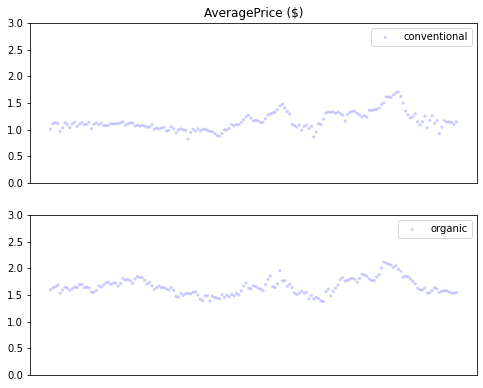

In [106]:
import matplotlib.pyplot as plt

thinkplot.PrePlot(rows=3)
for i, (name, daily) in enumerate(dailies.items()):
    thinkplot.SubPlot(i+1)
    title = 'AveragePrice ($)' if i == 0 else ''
    thinkplot.Config(ylim=[0, 3], title=title)
    thinkplot.Scatter(daily.AveragePrice, s=10, label=name)
    if i == 2: 
        plt.xticks(rotation=30)
        thinkplot.Config()
    else:
        thinkplot.Config(xticks=[])

## linear regression

In [123]:
import statsmodels.formula.api as smf

def RunLinearModel(daily):
    model = smf.ols('AveragePrice ~ years', data=daily)
    results = model.fit()
    return model, results

In [124]:
from IPython.display import display

for name, daily in dailies.items():
    model, results = RunLinearModel(daily)
    print(name)
    display(results.summary())

conventional


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AveragePrice   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     59.12
Date:                Thu, 18 Nov 2021   Prob (F-statistic):           1.21e-12
Time:                        15:37:36   Log-Likelihood:                 85.844
No. Observations:                 169   AIC:                            -167.7
Df Residuals:                     167   BIC:                            -161.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0089      0.022     44.971      0.000       0.965       1.053
years          0.0927      0.012      7.689      0.000       0.069       0.116
==============================================================================
Omnibus:                        7.793   Durbin-Watson:                   0.218
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                7.757
Skew:                           0.432   Prob(JB):                       0.0207
Kurtosis:                       3.595   Cond. No.                         4.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

organic


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AveragePrice   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     7.005
Date:                Thu, 18 Nov 2021   Prob (F-statistic):            0.00891
Time:                        15:37:36   Log-Likelihood:                 81.398
No. Observations:                 169   AIC:                            -158.8
Df Residuals:                     167   BIC:                            -152.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6013      0.023     69.526      0.000       1.556       1.647
years          0.0327      0.012      2.647      0.009       0.008       0.057
==============================================================================
Omnibus:                        5.533   Durbin-Watson:                   0.173
Prob(Omnibus):                  0.063   Jarque-Bera (JB):                5.594
Skew:                           0.443   Prob(JB):                       0.0610
Kurtosis:                       2.908   Cond. No.                         4.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The estimated conventional slopes indicate that the average price of avocado increased by about 9.3 cents per year during the observed interval;
### The estimated organical slopes indicate that the average price of avocado increased by about 3.3 cents per year during the observed interval;

### The R2 value for convecntional avocado is 0.26, which means that time as an explanatory variable accounts for 26% of the observed variability in average price.
### For the other qualities, the change in price is smaller, and variability in prices is higher, so the values of R 2 are smaller

In [125]:
def PlotFittedValues(model, results, label=''):
    """Plots original data and fitted values.

    model: StatsModel model object
    results: StatsModel results object
    """
    years = model.exog[:,1]
    values = model.endog
    thinkplot.Scatter(years, values, s=15, label=label)
    thinkplot.Plot(years, results.fittedvalues, label='model', color='#ff7f00')

In [126]:
def PlotLinearModel(daily, name):
    """Plots a linear fit to a sequence of prices, and the residuals.
    
    daily: DataFrame of daily prices
    name: string
    """
    model, results = RunLinearModel(daily)
    PlotFittedValues(model, results, label=name)
    thinkplot.Config(title='Fitted values',
                     xlabel='Years',
                     ylabel='AveragePrice ($)')

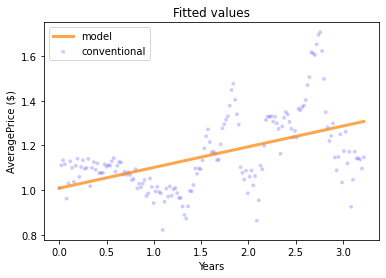

In [127]:
name = 'conventional'
daily = dailies[name]

PlotLinearModel(daily, name)

### Here you can see our graphics

# Rolling mean

## The following function plots the rolling mean.

In [155]:
def PlotRollingMean(daily, name):
    """Plots rolling mean.

    daily: DataFrame of daily prices
    """
    dates = pd.date_range(daily.index.min(), daily.index.max())
    reindexed = daily.reindex(dates)
    reindexed.dropna(inplace=True)
    thinkplot.Scatter(reindexed.AveragePrice, s=15, alpha=0.2, label=name)
    roll_mean = reindexed.AveragePrice.rolling(5).mean()
    thinkplot.Plot(roll_mean, label='rolling mean', color='#ff7f00')
    plt.xticks(rotation=30)
    thinkplot.Config(ylabel='price per gram ($)')

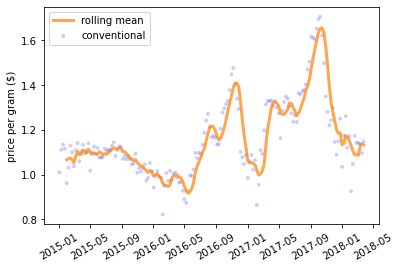

In [156]:
PlotRollingMean(daily, name)

# EWMA

## The exponentially-weighted moving average gives more weight to more recent points.

In [117]:
def PlotEWMA(daily, name):
  
    dates = pd.date_range(daily.index.min(), daily.index.max())
    reindexed = daily.reindex(dates)

    thinkplot.Scatter(reindexed.AveragePrice, s=20, alpha=0.5, label=name)
    roll_mean = reindexed.AveragePrice.ewm(30).mean()
    thinkplot.Plot(roll_mean, label='EWMA', color='#ff7f00')
    plt.xticks(rotation=30)
    thinkplot.Config(ylabel='AveragePrice ($)')

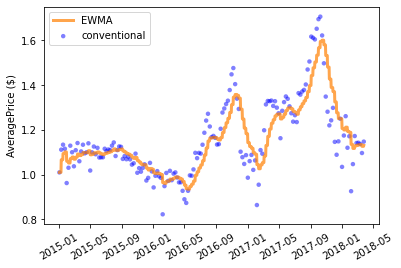

In [65]:
PlotEWMA(daily, name)

# confidential intervals

In [169]:
def SimulateResults(daily, iters=101, func=RunLinearModel):
    _, results = func(daily)
    fake = daily.copy()
    
    result_seq = []
    for _ in range(iters):
        fake.AveragePrice = results.fittedvalues + thinkstats2.Resample(results.resid)
        _, fake_results = func(fake)
        result_seq.append(fake_results)

    return result_seq

In [170]:
def GeneratePredictions(result_seq, years, add_resid=False):
    n = len(years)
    d = dict(Intercept=np.ones(n), years=years, years2=years**2)
    predict_df = pd.DataFrame(d)
    
    predict_seq = []
    for fake_results in result_seq:
        predict = fake_results.predict(predict_df)
        if add_resid:
            predict += thinkstats2.Resample(fake_results.resid, n)
        predict_seq.append(predict)

    return predict_seq

In [173]:
def PlotPredictions(daily, years, iters=101, percent=90, func=RunLinearModel):

    result_seq = SimulateResults(daily, iters=iters, func=func)
    p = (100 - percent) / 2
    percents = p, 100-p

    predict_seq = GeneratePredictions(result_seq, years, add_resid=True)
    low, high = thinkstats2.PercentileRows(predict_seq, percents)
    thinkplot.FillBetween(years, low, high, alpha=0.3, color='gray')

    predict_seq = GeneratePredictions(result_seq, years, add_resid=False)
    low, high = thinkstats2.PercentileRows(predict_seq, percents)
    thinkplot.FillBetween(years, low, high, alpha=0.5, color='gray')

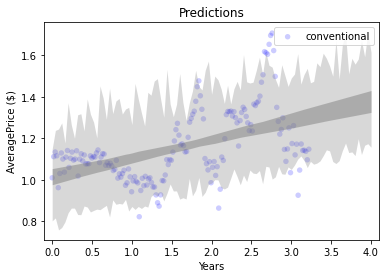

In [175]:
years = np.linspace(0, 4, 101)
thinkplot.Scatter(daily.years, daily.AveragePrice, alpha=0.2, label=name)
PlotPredictions(daily, years)
xlim = years[0]-0.1, years[-1]+0.1
thinkplot.Config(title='Predictions',
                   xlabel='Years',
                   xlim=xlim,
                   ylabel='AveragePrice ($)')

## in our graph, we see that the confidence interval is approximately 90%, which means that we can rely on our confidence interval. Due to the points, we get our prediction and see that the average price of an avocado is growing significantly

In [176]:
def SimulateIntervals(daily, iters=101, func=RunLinearModel):

    result_seq = []
    starts = np.linspace(0, len(daily), iters).astype(int)

    for start in starts[:-2]:
        subset = daily[start:]
        _, results = func(subset)
        fake = subset.copy()

        for _ in range(iters):
            fake.AveragePrice = (results.fittedvalues + 
                        thinkstats2.Resample(results.resid))
            _, fake_results = func(fake)
            result_seq.append(fake_results)

    return result_seq

In [177]:
def PlotIntervals(daily, years, iters=101, percent=90, func=RunLinearModel):

    result_seq = SimulateIntervals(daily, iters=iters, func=func)
    p = (100 - percent) / 2
    percents = p, 100-p

    predict_seq = GeneratePredictions(result_seq, years, add_resid=True)
    low, high = thinkstats2.PercentileRows(predict_seq, percents)
    thinkplot.FillBetween(years, low, high, alpha=0.2, color='gray')

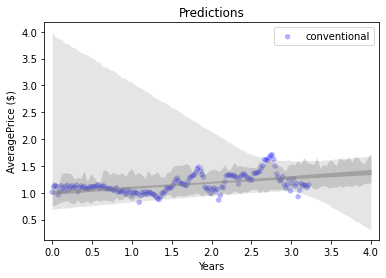

In [181]:
name = 'conventional'
daily = dailies[name]

thinkplot.Scatter(daily.years, daily.AveragePrice, alpha=0.3, label=name)
PlotIntervals(daily, years)
PlotPredictions(daily, years)
xlim = years[0]-0.1, years[-1]+0.1
thinkplot.Config(title='Predictions',
                 xlabel='Years',
                 xlim=xlim,
                 ylabel='AveragePrice ($)')

## here, too, we can see that the average price of avocado is growing

## Our model does not contain seasonal components

# Week 11

## Survival analysis


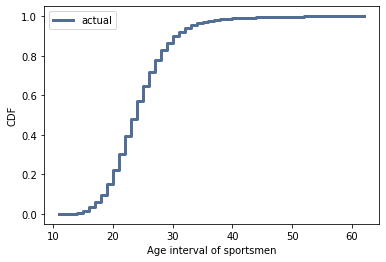

In [4]:
cdf = thinkstats2.Cdf(df['Age'][df['Year']==1992], label='actual')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Age interval of sportsmen', ylabel='CDF')

In [5]:
import survival

def MakeSurvivalFromCdf(cdf, label=''):
    """Makes a survival function based on a CDF.

    cdf: Cdf
    
    returns: SurvivalFunction
    """
    ts = cdf.xs
    ss = 1 - cdf.ps
    return survival.SurvivalFunction(ts, ss, label)

In [6]:
sf = MakeSurvivalFromCdf(cdf, label='survival')

## So we have an unbiased sample of complete lifetimes, we can compute the survival function from the CDF and the hazard function from the survival function.

In [7]:
print(cdf[13])
print(sf[13])

0.001344003909829556
0.9986559960901704


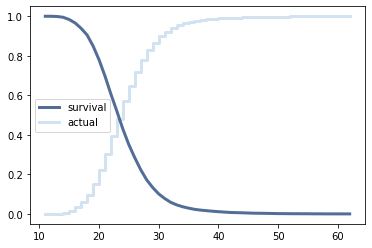

In [8]:
thinkplot.Plot(sf)
thinkplot.Cdf(cdf, alpha=0.2)
thinkplot.Config(loc='center left')

## here we make hazard function 

In [9]:
hf = sf.MakeHazardFunction(label='hazard')
print(hf[39])

0.16728624535315506


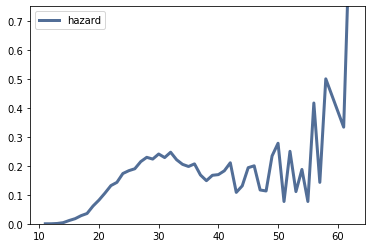

In [10]:
thinkplot.Plot(hf)
thinkplot.Config(ylim=[0, 0.75], loc='upper left')

# Kaplan-Meier

### The following function uses Kaplan-Meier to estimate the hazard function.

In [11]:
from collections import Counter

def EstimateHazardFunction(complete, ongoing, label='', verbose=False):
    if np.sum(np.isnan(complete)):
        raise ValueError("complete contains NaNs")
    if np.sum(np.isnan(ongoing)):
        raise ValueError("ongoing contains NaNs")

    hist_complete = Counter(complete)
    hist_ongoing = Counter(ongoing)

    ts = list(hist_complete | hist_ongoing)
    ts.sort()

    at_risk = len(complete) + len(ongoing)

    lams = pd.Series(index=ts)
    for t in ts:
        ended = hist_complete[t]
        censored = hist_ongoing[t]

        lams[t] = ended / at_risk
        if verbose:
            print(t, at_risk, ended, censored, lams[t])
        at_risk -= ended + censored

    return survival.HazardFunction(lams, label=label)

In [47]:
complete=df['Age'][df['Medal']=='Gold'].dropna()
ongoing=df['Age'][df['Medal']!='nan'].dropna()

### complete is the set of complete observations; in this case, the ages when respondents got silver medal
### ongoing is the set of incomplete observations; that is, the ages when respondents didnt got a  medal


<ipython-input-11-b868743a10e5>:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lams = pd.Series(index=ts)


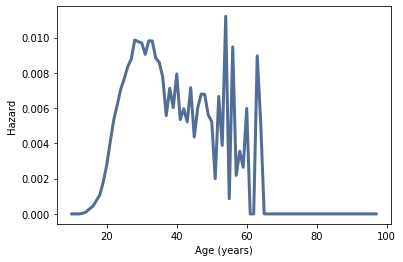

In [48]:
hf = EstimateHazardFunction(complete, ongoing)
thinkplot.Plot(hf)
thinkplot.Config(xlabel='Age (years)',
                 ylabel='Hazard')

## We can see that a large number of gold medal survivors are around 20-30 years old. In the region of 40-50, it decreases.